- q1 = data.weight.quantile(0.25): 몸무게(weight)에 대한 1사분위수(하위 25%)
- q3 = data.weight.quantile(0.75): 몸무게(weight)에 대한 3사분위수(하위 75%)
- value = abs(q1-q3): (1사분위수-3사분위수) 차이의 절댓값
- int(value): 정수형 변환(소수점 이하 버림)

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import math

data = pd.read_csv('/content/drive/MyDrive/work/women.csv', header=0, index_col=0)
print(data.head())
print(data.describe())
print(data.shape)
print(data.info())
print(data.dtypes)
print(data.index)

q1 = data.weight.quantile(0.25)
q3 = data.weight.quantile(0.75)
print('몸무게(weight)에 대한 제1사분위수: ', end=''); print(q1)
print('몸무게(weight)에 대한 제3사분위수: ', end=''); print(q3)
value = abs(q1-q3)
print('(1사분위수-3사분위수)의 절대값 ', end=''); print(value)
print('정수형으로 변환한 값(int())/소수점이하 버림: ', end=''); print(int(value))
print('반올림한 값(round()): ', end=''); print(round(value))
print('올림한 값(ceil()): ', end=''); print(math.ceil(value))
print('내림한 값(floor()): ', end=''); print(math.floor(value))

Mounted at /content/drive
   height  weight
1      58     115
2      59     117
3      60     120
4      61     123
5      62     126
          height      weight
count  15.000000   15.000000
mean   65.000000  136.733333
std     4.472136   15.498694
min    58.000000  115.000000
25%    61.500000  124.500000
50%    65.000000  135.000000
75%    68.500000  148.000000
max    72.000000  164.000000
(15, 2)
<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 1 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   height  15 non-null     int64
 1   weight  15 non-null     int64
dtypes: int64(2)
memory usage: 360.0 bytes
None
height    int64
weight    int64
dtype: object
Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')
몸무게(weight)에 대한 제1사분위수: 124.5
몸무게(weight)에 대한 제3사분위수: 148.0
(1사분위수-3사분위수)의 절대값 23.5
정수형으로 변환한 값(int())/소수점이하 버림: 23
반올림한 값(round()): 24
올림한 값(ceil()): 24
내림한 값(floor()): 23


- data['ratio'] = data['likes']/data['views']: 전체 반응들 중 긍정적 반응의 비율
- cond = (data['category_id'] == 10) & (data['ratio']>0.04)&(data['ratio']<0.05): 조건식
- data[cond].count()['category_id']: 조건에 해당되는 영상의 개수

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/work/USvideos.csv', header=0, index_col=0)
print(data.head())
print(data.describe())
print(data.shape)
print(data.info())
print(data.dtypes)
print(data.index)

data['ratio'] = data['likes']/data['views']
cond = (data['category_id'] == 10) & (data['ratio']>0.04)&(data['ratio']<0.05)
print('조건에 해당하는 영상의 개수: ', end=''); print(data[cond].count()['category_id'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         trending_date   channel_title  category_id              publish_time  \
video_id                                                                        
1             18.29.05  BuzzFeed Celeb           22  2018-05-18T16:39:29.000Z   
2             18.29.05      Brad Mondo           24  2018-05-18T17:34:22.000Z   
3             18.29.05        zefrank1           22  2018-05-18T01:00:06.000Z   
4             18.29.05    Call of Duty           20  2018-05-17T17:09:38.000Z   
5             18.29.05             Vox           25  2018-05-18T11:00:03.000Z   

            views   likes  dislikes  
video_id                             
1         6598339  601506      3518  
2          975457   45296      1009  
3          931838   56564       356  
4         9403494  342142    203547  
5          471757    8092       655  
       category_id         views     

- data['datetime_transform']=pd.to_datetime(data['date_added']): 문자열(object)을 날짜형으로 변환
- data['year'] = data['datetime_transform'].dt.year: 연도 추출
- data['month'] = data['datetime_transform'].dt.month: 월 추출
- cond=(data['year']=2021)&((data['month']==7)(data['month']==8))&(data['country']=='United Kingdom'): 조건식
- data[cond].count(): 조건에 해당되는 콘텐츠의 수

In [6]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import datetime as dt

data = pd.read_csv('/content/drive/MyDrive/work/netflixutf.csv', header=0, index_col=0)
print(data.head())
print(data.describe())
print(data.shape)
print(data.info())
print(data.dtypes)
print(data.index)

print('***********************************')
data['datetime_transform']=pd.to_datetime(data['date_added'])
print(data['datetime_transform'].dtypes)
data['year'] = data['datetime_transform'].dt.year
data['month'] = data['datetime_transform'].dt.month

print(data.head())
print('[year] 자료 형식(type)): ', end=''); print(data['year'].dtypes)
print('[month] 자료 형식(type)): ', end=''); print(data['month'].dtypes)

cond = (data['year']==2021) & ((data['month']==7) | (data['month']==8)) & (data['country']=='United Kingdom')
print('@@@@@@@@ 조건을 만족하는 개수 @@@@@@@@@@@@@@@@@@@@@@@@@@@@')
print(data[cond].count())
print('2021년 (7월, 8월)인 영상들 중 등록국가가 영국인 경우의 수(작품): ', end=''); print(data[cond].count()['title'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
             type                  title         director         country  \
show_id                                                                     
s1          Movie   Dick Johnson Is Dead  Kirsten Johnson   United States   
s2       TV Show           Blood & Water              NaN    South Africa   
s3        TV Show              Ganglands  Julien Leclercq  United Kingdom   
s4        TV Show  Jailbirds New Orleans              NaN  United Kingdom   
s5        TV Show           Kota Factory              NaN           India   

         date_added  release_year rating   duration  
show_id                                              
s1       2021-09-25          2020  PG-13     90 min  
s2       2021-09-24          2021  TV-MA  2 Seasons  
s3       2021-09-24          2021  TV-MA   1 Season  
s4       2021-09-24          2021  TV-MA   1 Season  
s5     

- x = df[['bmi', 'children', 'smoker', 'charges']].to_numpy(): 독립변수
- y = df['sex'].to_numpy(): 종속변수
- trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.2, random_state=42): (훈련, 검증) 데이터 랜덤 추출
- model = RandomForestClassifier(n_estimators=100, random_state=42): 랜덤 포레스트 모형 구축
- model.fit(trainx, trainy): 모형 훈련(적합)
- predictions = model.predict(testx): 검증데이터 예측 결과 저장

In [7]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv('/content/drive/MyDrive/work/insurance.csv', index_col=0)
print(data.dtypes)
df = data.dropna()
df['sex'] = df['sex'].map({'female':0, 'male':1}).astype('category')
df['smoker'] = df['smoker'].map({'no':0,'yes':1})
x = df[['bmi', 'children', 'smoker', 'charges']].to_numpy()
y = df['sex'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(trainx, trainy)
predictions = model.predict(testx)
print(predictions[:10])
print('Random Forest(랜덤포레스트) 분류 모형 성능(정확도): ', end=''); print(accuracy_score(testy, predictions))
print('$$$ Confusion Matrix, 혼동행렬 $$$')
conf = confusion_matrix(testy, predictions)
print(conf)
print('*** 분류 분석 모형 성능평가 지표 ***')
print(classification_report(testy, predictions))
print('!!! 특성 중요도 !!!')
print(model.feature_importances_)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
[1 1 0 1 1 0 0 0 1 1]
Random Forest(랜덤포레스트) 분류 모형 성능(정확도): 0.5485074626865671
$$$ Confusion Matrix, 혼동행렬 $$$
[[65 75]
 [46 82]]
*** 분류 분석 모형 성능평가 지표 ***
              precision    recall  f1-score   support

           0       0.59      0.46      0.52       140
           1       0.52      0.64      0.58       128

    accuracy                           0.55       268
   macro avg       0.55      0.55      0.55       268
weighted avg       0.56      0.55      0.55       268

!!! 특성 중요도 !!!
[0.42453014 0.06495975 0.01072895 0.49978116]


- model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42): 그래디언트 부스팅 모형 정의, 트리의 개수=500, 학습률=0.2

In [8]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
data = pd.read_csv('/content/drive/MyDrive/work/insurance.csv', index_col=0)
print(data.dtypes); df = data.dropna()
df['sex'] = df['sex'].map({'female':0, 'male':1}).astype('category')
df['smoker'] = df['smoker'].map({'no':0,'yes':1})
x = df[['bmi', 'children', 'smoker', 'charges']].to_numpy()
y = df['sex'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.2, random_state=42)
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
model.fit(trainx, trainy)
predictions = model.predict(testx)
print(predictions[:10])
print('ExtraTreesClassifier 정확도(Boostrap 샘플 미사용): ', end=''); print(accuracy_score(testy, predictions))
print('$$$ Confusion Matrix, 혼동행렬 $$$')
conf = confusion_matrix(testy, predictions)
print(conf)
print('*** 분류 분석 모형 성능평가 지표 ***')
print(classification_report(testy, predictions))
print('!!! 특성 중요도 !!!')
print(model.feature_importances_)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
[1 0 0 1 0 0 0 0 0 1]
ExtraTreesClassifier 정확도(Boostrap 샘플 미사용): 0.6268656716417911
$$$ Confusion Matrix, 혼동행렬 $$$
[[78 62]
 [38 90]]
*** 분류 분석 모형 성능평가 지표 ***
              precision    recall  f1-score   support

           0       0.67      0.56      0.61       140
           1       0.59      0.70      0.64       128

    accuracy                           0.63       268
   macro avg       0.63      0.63      0.63       268
weighted avg       0.63      0.63      0.63       268

!!! 특성 중요도 !!!
[0.24863927 0.03453706 0.00541448 0.71140919]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
분류결과 첫 10행 출력
[0 1 0 0 0 0 0 0 0 0]
Decision Tree 분류기(결정트리 알고리즘) 정확도: 0.5575485799701047
$$$ Confusion Matrix, 혼동행렬 $$$
[[599  63]
 [529 147]]
*** 분류 분석 모형 성능평가 지표 ***
              precision    recall  f1-score   support

           0       0.53      0.90      0.67       662
           1       0.70      0.22      0.33       676

    accuracy                           0.56      1338
   macro avg       0.62      0.56      0.50      1338
weighted avg       0.62      0.56      0.50      1338

!!! 특성 중요도 !!!
[0.1346036 0.        0.        0.8653964]


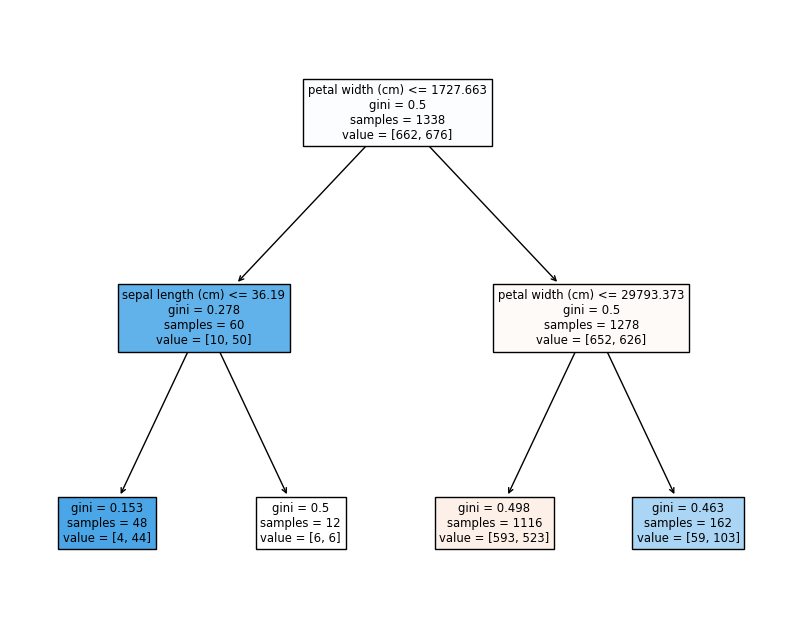

In [9]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
data = pd.read_csv('/content/drive/MyDrive/work/insurance.csv', index_col=0)
print(data.dtypes); df = data.dropna()
df['sex'] = df['sex'].map({'female':0, 'male':1}).astype('category')
df['smoker'] = df['smoker'].map({'no':0,'yes':1})
x = df[['bmi', 'children', 'smoker', 'charges']].to_numpy()
y = df['sex'].to_numpy()
model = DecisionTreeClassifier(max_depth=2, random_state=42)
scores = cross_validate(model, x, y, return_train_score=True)
model.fit(x, y)
predictions = model.predict(x)
print('분류결과 첫 10행 출력')
print(predictions[:10])
print('Decision Tree 분류기(결정트리 알고리즘) 정확도: ', end=''); print(accuracy_score(y, predictions))
print('$$$ Confusion Matrix, 혼동행렬 $$$')
conf = confusion_matrix(y, predictions)
print(conf)
print('*** 분류 분석 모형 성능평가 지표 ***')
print(classification_report(y, predictions))
print('!!! 특성 중요도 !!!')
print(model.feature_importances_)
plt.figure(figsize=(10, 8))
plot_tree(model, filled=True, feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
plt.show()

- cond = (data['종량제봉투처리방식'] == '소각용') & (data['종량제봉투사용대상']=='가정용') & (data['2L가격'] != 0): 조건식
- price = data[cond]['2L 가격'].mean(): 조건식에 해당되는 2L 종량제봉투의 평균 가격

In [10]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/work/garbagebag.csv', encoding='euc-kr')
print(data.head())
print(data.describe())
print(data.shape)
print(data.info())
print(data.dtypes)
print(data.index)

cond=(data['종량제봉투처리방식']=='소각용') & (data['종량제봉투사용대상']=='가정용') & (data['2L가격'] != 0)
price = data[cond]['2L가격'].mean()
print('2L 종량제 봉투의 평균 가격(원): ', end=''); print(round(price, 5))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   시도명 시군구명 종량제봉투종류 종량제봉투처리방식 종량제봉투용도 종량제봉투사용대상  1L가격  1.5L가격  2L가격  2.5L가격  \
0  경기도  안양시    규격봉투       매립용   생활쓰레기      사업장용     0       0     0       0   
1  경기도  안양시    규격봉투       매립용   생활쓰레기        기타     0       0     0       0   
2  경기도  안양시    규격봉투       소각용  음식물쓰레기       가정용     0      50     0      80   
3  경기도  안양시    규격봉투       소각용  음식물쓰레기      사업장용     0      50     0      80   
4  경기도  안양시    규격봉투       소각용  음식물쓰레기        기타     0      50     0      80   

   ...  5L가격  10L가격  20L가격  30L가격  50L가격  60L가격  75L가격  100L가격  120L가격  125L가격  
0  ...   150    300    550      0   1400      0   2100       0       0       0  
1  ...   150    300    550      0   1400      0   2100       0       0       0  
2  ...   150    300    550      0      0      0      0       0       0       0  
3  ...   150    300    550      0      0      0      0       0       0  

- data['bmi'] = data['Weight'] / (data['Height']/100*data['Height']/100): BMI 계산 (열 추가)
- overweight = (data[data['bmi']>=25).count()['bmi']: 과체중인 사람의 수(BMI>=25)
- normal = (data[data['bmi']<25]).count()['bmi']: 정상 체중인 사람의 수(BMI<25)

In [11]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/work/index.csv')
print(data.head())
print(data.describe())
print(data.shape)
print(data.info())
print(data.dtypes)
print(data.index)
data['bmi'] = data['Weight'] / (data['Height']/100*data['Height']/100)
print(data.head())
overweight = (data[data['bmi']>=25]).count()['bmi']
print('과체중(BMI가 25이상)인 사람의 수(명): ', end=''); print(overweight)
normal = (data[data['bmi']<25]).count()['bmi']
print('정상 체중(BMI가 25미만)인 살마의 수(명): ', end=''); print(normal)
print('과체중인 사람의 수 - 정상 체중인 사람의 수(명): ', end=''); print(overweight-normal)
print('----------index 열 값으로 계산하기---------------')
print('index=0인 사람의 수(명): ', end=''); print((data.index==0).sum())
print('index=1인 사람의 수(명): ', end=''); print((data.index==1).sum())
print('index=2인 사람의 수(명): ', end=''); print((data.index==2).sum())
print('index=3인 사람의 수(명): ', end=''); print((data.index==3).sum())
print('index=4인 사람의 수(명): ', end=''); print((data.index==4).sum())
print('index=5인 사람의 수(명): ', end=''); print((data.index==5).sum())
print('index=3이상인 사람의 수 - index=2이하인 사람의 수 (명): ', end=''); print((data.index >= 3).sum()-(data.index<=2).sum())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3
           Height      Weight       Index
count  500.000000  500.000000  500.000000
mean   169.944000  106.000000    3.748000
std     16.375261   32.382607    1.355053
min    140.000000   50.000000    0.000000
25%    156.000000   80.000000    3.000000
50%    170.500000  106.000000    4.000000
75%    184.000000  136.000000    5.000000
max    199.000000  160.000000    5.000000
(500, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3

- dfnew['net'] = dfnew['전입학생수합계(명)']-dfnew['전출학생수합계(명)']: 순전입학생수 계산(열 추가)
- dfnew1 = dfnew.sort_values(['net'], ascending=False): 순전입학생수 내림차순 정렬
- dfnew1.iloc[0]['net']: 순전입학생수가 가장 많은 학교의 순전입학생수(명)
- dfnew1.iloc[0]['전체학생수합계(명)']: 순전입학생수가 가장 많은 학교의 전체학생수(명)

In [12]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/work/student.csv', encoding='euc-kr')
print('전입학생수합계(명) 결측 데이터 개수: ', end=''); print(data['전입학생수합계(명)'].isnull().sum())
df = data.dropna(subset=['전입학생수합계(명)', '전출학생수합계(명)'])
dfnew = df.copy()
print(dfnew.head())
print(dfnew.describe())
print(dfnew.shape)
print(dfnew.info())
print(dfnew.dtypes)
print(dfnew.index)
dfnew['net'] = dfnew['전입학생수합계(명)']- dfnew['전출학생수합계(명)']
print(dfnew.head())
dfnew1 = dfnew.sort_values(['net'], ascending=False)
print(dfnew1.head())

print('순전입학생수가 가장 많은 학교(내림차순 정렬 후 첫번째 행): ', end=''); print(dfnew1.iloc[0]['학교명'])
print('순전입학생수가 가장 많은 학교(내림차순 정렬 후 두번째 행): ', end=''); print(dfnew1.iloc[1]['학교명'])
print('순전입학생수가 가장 많은 학교의 순전입학생수(명): ', end=''); print(dfnew1.iloc[0]['net'])
print('순전입학생수가 가장 많은 학교의 전체학생수(명): ', end=''); print(dfnew1.iloc[0]['전체학생수합계(명)'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
전입학생수합계(명) 결측 데이터 개수: 1161
    기준년도  시군명      지역명          학교명 설립구분명  1학년전입학생수(명)  1학년전출학생수(명)  \
6   2020  가평군  경기도 가평군     가평마장초등학교    공립          4.0          1.0   
7   2020  가평군  경기도 가평군       가평초등학교    공립          3.0          3.0   
8   2020  가평군  경기도 가평군       대성초등학교    공립          0.0          0.0   
9   2020  가평군  경기도 가평군       목동초등학교    공립          0.0          1.0   
10  2020  가평군  경기도 가평군  목동초등학교명지분교장    공립          0.0          0.0   

    1학년전체학생수(명)  2학년전입학생수(명)  2학년전출학생수(명)  ...  4학년전체학생수(명)  5학년전입학생수(명)  \
6          14.0          1.0          2.0  ...         15.0          1.0   
7         135.0          3.0          1.0  ...        123.0          6.0   
8          11.0          1.0          2.0  ...         16.0          1.0   
9          18.0          0.0          1.0  ...         15.0          0.0   
10          3.0          0.0         

- x = data[['year', 'mileage', 'tax', 'mpg', 'engineSize']]: 독립변수 정의
- y = data['price']: 종속변수 정의(자동차 가격)
- fit = ols('y ~ x', data=data).fit(): 다중 선형회귀 분석 모형 정의
- pred = fit.predict(x): 독립변수에 대한 예측값

In [14]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.formula.api import ols
data = pd.read_csv( '/content/drive/MyDrive/work/carprice.csv', header=0, index_col=0)
print(data.head())
x = data[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = data['price']
fit = ols('y ~ x', data=data).fit()
print(fit.summary())
pred = fit.predict(x)

mse = mean_squared_error(y, pred)
print('MSE(Mean Squared Error)/평균제곱오차: ', end=''); print(mse)
print('RMSE(Root Mean Squared Error)/평균제곱근오차: ', end=''); print(np.sqrt(mse))
mae = mean_absolute_error(y, pred)
print('MAE(Mean Absolute Error)/평균절대오차: ', end=''); print(mae)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       year transmission  mileage fuelType  tax   mpg  engineSize  price
model                                                                   
 A1    2017       Manual    15735   Petrol  150  55.4         1.4  12500
 A6    2016    Automatic    36203   Diesel   20  64.2         2.0  16500
 A1    2016       Manual    29946   Petrol   30  55.4         1.4  11000
 A4    2017    Automatic    25952   Diesel  145  67.3         2.0  16800
 A3    2019       Manual     1998   Petrol  145  49.6         1.0  17300
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     7369.
Date:                Tue, 18 Jun 2024   Prob

- model = DecisionTreeRegressor(random_state=42): 결정트리(회귀모형, 연속형 변수) 모형
- fit = model.fit(x,y): 모형 훈련(적합)
- pred = fit.predict(x): 독립변수에 대한 예측값 저장

In [15]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
data = pd.read_csv('/content/drive/MyDrive/work/carprice.csv', header=0, index_col=0)
print(data.head())
x = data[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = data['price']
model = DecisionTreeRegressor(random_state=42)
fit = model.fit(x, y)
pred = fit.predict(x)

print('종속변수 예측 결과값(차량 가격)/첫 10행')
print(pred[:10])

mse = mean_squared_error(y, pred)
print('MSE(Mean Squared Error)/평균제곱오차: ', end=''); print(mse)
print('RMSE(Root Mean Squared Error)/평균제곱근오차: ', end=''); print(np.sqrt(mse))
mae = mean_absolute_error(y, pred)
print('MAE(Mean Absolute Error)/평균절대오차: ', end=''); print(mae)

print('!!! 특성 중요도 !!!')
print(model.feature_importances_)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       year transmission  mileage fuelType  tax   mpg  engineSize  price
model                                                                   
 A1    2017       Manual    15735   Petrol  150  55.4         1.4  12500
 A6    2016    Automatic    36203   Diesel   20  64.2         2.0  16500
 A1    2016       Manual    29946   Petrol   30  55.4         1.4  11000
 A4    2017    Automatic    25952   Diesel  145  67.3         2.0  16800
 A3    2019       Manual     1998   Petrol  145  49.6         1.0  17300
종속변수 예측 결과값(차량 가격)/첫 10행
[12500. 16500. 11000. 16800. 17300. 13900. 13250. 11750. 10200. 12000.]
MSE(Mean Squared Error)/평균제곱오차: 489860.9063283959
RMSE(Root Mean Squared Error)/평균제곱근오차: 699.9006403257507
MAE(Mean Absolute Error)/평균절대오차: 134.598999448662
!!! 특성 중요도 !!!
[0.24244214 0.04631194 0.04988775 0.45684558 0.20451259]
